In [ ]:
! pip install -U scikit-image

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import io
%matplotlib inline

In [ ]:
path = r'data\Brown_spot\DSC_0100.jpg'
image = io.imread(path)
type(image), image.shape
plt.imshow(image)

In [ ]:
path = r'data\Brown_spot\DSC_0100.jpg'
image = io.imread(path, as_gray=True)
type(image), image
plt.imshow(image)

In [ ]:
image.shape[0]*image.shape[1]

In [ ]:
## Scaling
from skimage.transform import rescale, resize
scimg = rescale(image, 1/2)
image.shape, scimg.shape

In [ ]:
plt.imshow(scimg)

In [ ]:
plt.imshow(image)

In [ ]:
# Resize 
resizedimg = resize(scimg, output_shape=(228,228))
resizedimg.shape

In [ ]:
plt.imshow(resizedimg)

In [ ]:
import os
os.getcwd()
# data\Bacterial_leaf_blight\DSC_0365.JPG
os.listdir('data')
os.listdir('data\Bacterial_leaf_blight')

In [ ]:
# Trnasformatiom
class Transform:
    def __init__(self, dirs:list[str]) -> None:
        self.from_path = 'data'
        self.to_path = 'processed_data'
        self.dirs = dirs
        self.cls = {dirs[i]: i for i in range(len(dirs))}
        self.images_path = [
            (f'data\\{dir}\\{img}', f'processed_data\\{img.split(".")[0]}_{self.cls[dir]}.{img.split(".")[1]}') for dir in self.dirs for img in os.listdir(f'data\\{dir}')]
        print(len(self.images_path))
    
    def transform(self):
        for img, pimg in self.images_path:
            image = io.imread(img, as_gray=True)
            scimg = rescale(image, 1/2)
            resized_img = resize(scimg, (228,228))
            io.imsave(pimg, resized_img)
        return True

In [92]:
images_path = []
for dir in ['Bacterial_leaf_blight','Brown_spot', 'Leaf_smut']:
    for img in os.listdir(f'data\\{dir}'):
        img_path = img.split('.')
        img_path = img_path[0]+f'_0.'+img_path[1]
        images_path.append((f'data\\{dir}\\{img}', f'processed_data\\{img_path}'))

In [93]:
images_path[0]

('data\\Bacterial_leaf_blight\\DSC_0365.JPG', 'processed_data\\DSC_0365_0.JPG')

In [ ]:
tf_image = Transform(['Bacterial_leaf_blight','Brown_spot', 'Leaf_smut'])

In [ ]:
tf_image.transform()

## Modeling

In [54]:
import warnings
warnings.filterwarnings(action='ignore')

In [55]:
files = os.listdir(r'processed_data')

In [56]:
# Data Loading
images = []
labels = []
for  _ , pimg in tf_image.images_path:
    image = io.imread(pimg).ravel()/255
    label = int(pimg.split('.')[0][-1])
    images.append(image)
    labels.append(label)

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.33, random_state=42)

In [58]:
xtrain = np.array([image for image in X_train])
ytrain = np.array(y_train)
xtrain[0]

array([0.89411765, 0.89411765, 0.89411765, ..., 0.89803922, 0.89803922,
       0.89803922])

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=1)
model.fit(xtrain, ytrain)

In [ ]:
xtest = np.array([image for image in X_test])
y_test = np.array(y_test)
ypred = model.predict(X_test)
ypred

In [ ]:
from sklearn.metrics import plot_confusion_matrix, f1_score, accuracy_score
plot_confusion_matrix(model, X_test, y_test)

In [ ]:
f1_score(y_test, ypred, average='weighted')

In [ ]:
accuracy_score(y_test, ypred)

## SVM

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear' ,random_state=42)
svm.fit(xtrain, ytrain)

In [ ]:
ypred = svm.predict(xtest)
ypred == y_test

In [ ]:
plot_confusion_matrix(svm, xtest, y_test)

In [ ]:
f1_score(y_test, ypred, average='weighted')

In [ ]:
from joblib import dump
dump(svm, 'svmClassifier')

In [ ]:
images = []
labels = []
files = os.listdir(r'processed_data')
for  pimg in files:
    image = io.imread(f'processed_data\\{pimg}').ravel()/255
    label = int(pimg.split('.')[0][-1])
    images.append(image)
    labels.append(label)

In [ ]:
files

In [ ]:
Images = np.array([image for image in images])
labels = np.array(labels)

In [ ]:
from joblib import load

model = load('svmClassifier')

In [ ]:
ypred = model.predict(Images)
ypred == labels

# KNN

In [72]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=8)

In [73]:
xtest = np.array([image for image in X_test])
y_test = np.array(y_test)

In [74]:
ypred = knn.predict(xtest)
ypred == y_test

array([ True,  True,  True,  True, False,  True, False,  True, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True, False,  True, False, False, False,
        True,  True,  True,  True])

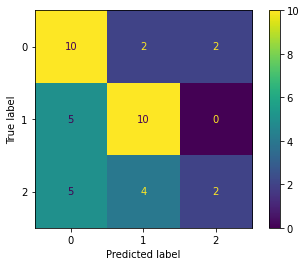

In [75]:
plot_confusion_matrix(knn, xtest, y_test)

In [76]:
f1_score(y_test, ypred, average='weighted')

0.5211511701454776

# Decision Tree

In [77]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)

RandomForestClassifier()

In [90]:
ypred = rf.predict(xtest)
ypred == y_test

array([ True,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
       False, False,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True])

In [91]:
ypred

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 0, 1, 1, 0, 2, 2, 2, 2, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 2, 1, 2, 0, 1, 0, 0, 2, 2, 0, 1, 2, 0])

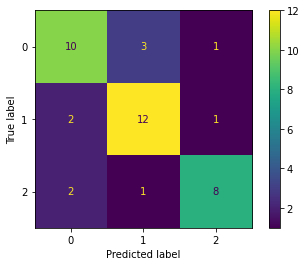

In [89]:
plot_confusion_matrix(rf, xtest, y_test)